<a href="https://colab.research.google.com/github/Alok1721/opencv/blob/main/background_blur_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cut out and pasting

['original' 'blur image' 'masked image']


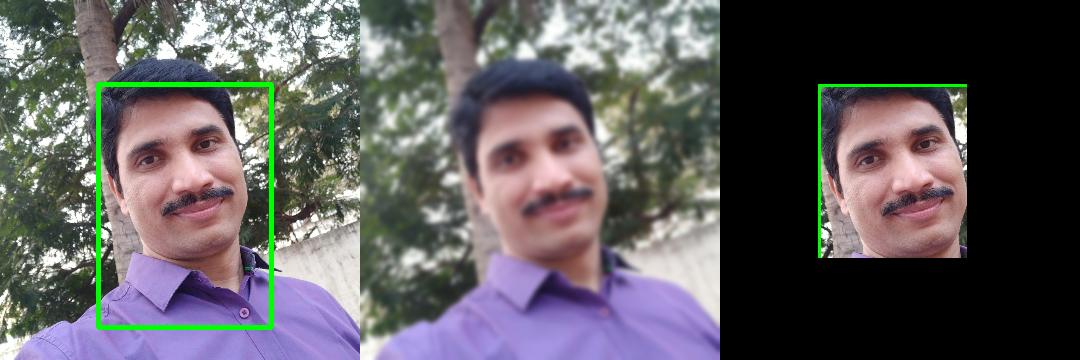

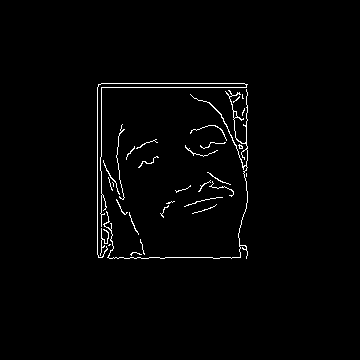

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img=cv2.imread("image1.jpg")
img=cv2.resize(img,(360,360))
Gaussian = cv2.GaussianBlur(img, (13, 13), 0)
edges = cv2.Canny(Gaussian,150,240)
contours, hierarchy = cv2.findContours(edges,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#import the face classifier for detecting the fdace
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
#drawing the rectangle around the face
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h+70), (0, 255, 0), 4)

#creating the mask
mask = np.zeros_like(img)
cv2.rectangle(mask, (x,y),(x+w-25,y+h), (255, 255, 255), -1)
mask_inv = cv2.bitwise_not(mask)

#applying the mask
masked_rectangles = cv2.multiply(img, mask)
output = cv2.add(Gaussian, masked_rectangles)
output1=cv2.bitwise_and(mask,img)

#applying the canny edges detection on masked image
Gaussian2 = cv2.GaussianBlur(output1, (5, 5), 0)
edges2 = cv2.Canny(Gaussian2,150,240)

#overlapping of the image
fianle_output=cv2.add(Gaussian,output1)

# cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
print(np.hstack(["original","blur image","masked image"]))
hi = np.hstack([img,Gaussian,output1])
cv2_imshow(hi)
cv2_imshow(edges2)



masked face region is : 173 173


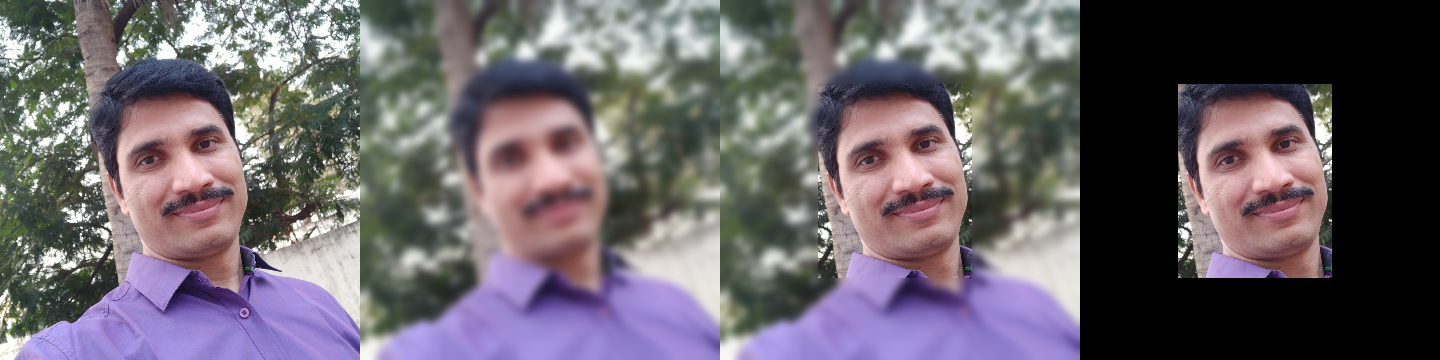

In [135]:
import cv2
#hhhhh
#hhhhh2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread("image1.jpg")

# Resize the image
img = cv2.resize(img, (360, 360))

# Apply Gaussian blur to the image
Gaussian = cv2.GaussianBlur(img, (23, 23), 0)

# Detect faces in the original image
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

# Create a mask for the face area
mask = np.zeros_like(img)
for (x, y, w, h) in faces:
    cv2.rectangle(mask, (x, y), (x + w-20, y + h+20), (255, 255, 255), -1)
print("masked face region is :",w,h)

# Apply the mask to the original image to get the masked face
masked_face = cv2.bitwise_and(img, mask)

# Apply Gaussian blur to the masked face for smoothing
blurred_face = cv2.GaussianBlur(masked_face, (15, 15), 0)

# Create a mask for the background
mask_inv = cv2.bitwise_not(mask)

# Apply the inverted mask to the original image to get the masked background
masked_background = cv2.bitwise_and(Gaussian, mask_inv)

# Combine the masked face with the masked background
final_output = cv2.add(masked_background, masked_face)

# Display the results
cv2_imshow(np.hstack([img, Gaussian, final_output,masked_face]))


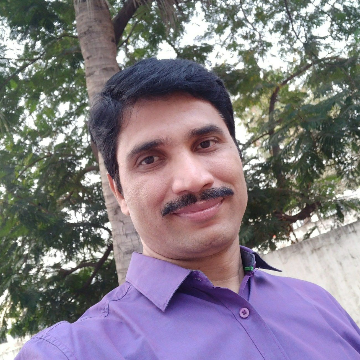

In [136]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread("image1.jpg")

# Resize the image
img = cv2.resize(img, (360, 360))

# Apply Gaussian blur to the entire image
Gaussian = cv2.GaussianBlur(img, (13, 13), 0)

# Detect the entire body in the original image
body_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")
bodies = body_classifier.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

# Create a mask for the entire body region
body_mask = np.zeros_like(img)
for (x, y, w, h) in bodies:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), -1)
    print("Body detected at coordinates:", x, y)

# Display the image with the drawn rectangles
cv2_imshow(img)


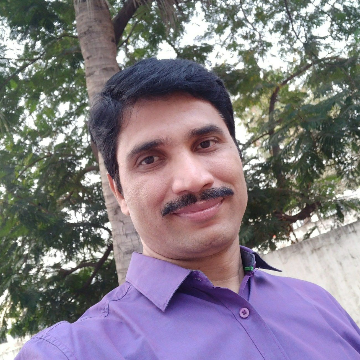

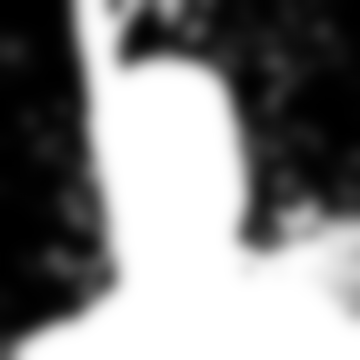

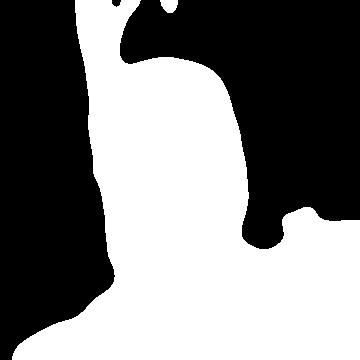

In [137]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("image1.jpg")
img=cv2.resize(img,(360,360))

# Convert the image to the LAB color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Define lower and upper bounds for the color of the object (adjust these values based on your image)
lower_bound = np.array([0, 128, 0], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask using inRange function
mask = cv2.inRange(lab_img, lower_bound, upper_bound)

# Apply a Gaussian blur to the mask to reduce noise
blurred_mask = cv2.GaussianBlur(mask, (55, 55), 0)

#apply the thresholding on blurred_mask
ret,thresh1 = cv2.threshold(blurred_mask,127,255,cv2.THRESH_BINARY )

# Use the blurred mask to extract the object from the original image
result = cv2.bitwise_and(img, img, mask=blurred_mask)

#apply bitwise_and to blur the background
output1=cv2.bitwise_and(thresh1,blurred_mask)

# Display the results
cv2_imshow( img)
cv2_imshow( blurred_mask)
cv2_imshow( thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [138]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread("image2.jpg")
img = cv2.resize(img, (360, 360))

# Convert the image to the LAB color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Define lower and upper bounds for the color
lower_bound = np.array([0, 128, 0], dtype=np.uint8)
upper_bound = np.array([220, 220, 200], dtype=np.uint8)

# Create a mask using inRange function
mask = cv2.inRange(lab_img, lower_bound, upper_bound)

# Apply a Gaussian blur to the mask to reduce noise
blurred_mask = cv2.GaussianBlur(mask, (35, 35), 0)
Gaussian=cv2.GaussianBlur(img,(23,23),0)

#apply canny edge detection on blurred_mask
blur_edge = cv2.Canny(blurred_mask, 20, 150)

# Apply thresholding on blurred_mask
ret1, thresh1 = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY_INV)

# Resize thresh1 to match the size of lab_img
thresh1_resized = cv2.resize(thresh1, (lab_img.shape[1], lab_img.shape[0]))

# Invert the thresholded image to create a mask for the background
background_mask = cv2.bitwise_not(thresh1_resized)

# Apply a Gaussian blur to the background using the inverted mask
blurred_background = cv2.GaussianBlur(img, (55, 55), 0, dst=cv2.bitwise_not(background_mask))

# Use the blurred mask to extract the object from the original image
result1 = cv2.bitwise_and(img, img, mask=thresh1)
result2 = cv2.bitwise_and(Gaussian, Gaussian, mask=thresh2)

# Use the inverted mask to extract the blurred background
blurred_result = cv2.bitwise_and(blurred_background, blurred_background, mask=background_mask)

# Combine the object and the blurred background
final_output = cv2.add(result1, blurred_result)

# Use the inverted mask to extract the face from the original image
# masked_face = cv2.bitwise_and(img,lab)

final_output2=cv2.add(result1,result2)

# Display the results
cv2_imshow(lab_img)
cv2_imshow(blurred_mask)
cv2_imshow(thresh1)
cv2_imshow(blur_edge)
# cv2_imshow(final_output2)
cv2_imshow(np.hstack([img,lab_img,final_output2]))
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


# Using the Depth map

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_path = "image1.jpg"
image = cv2.imread(image_path)

#resizing the image
desired_width = 400
aspect_ratio = image.shape[1] / image.shape[0]
desired_height = int(desired_width / aspect_ratio)
resized_image = cv2.resize(image, (desired_width, desired_height))

def onTrackbarChange(value):
    global blk_thresh
    blk_thresh = value
    print("Variable value:", blk_thresh)

def valueScaling(value):
    min_value = 0
    max_value = 100
    new_min = 0
    new_max = 255
    scaled_value = (value - min_value) * (new_max - new_min) / (max_value - min_value) + new_min
    return int(scaled_value)


blk_thresh = 50
scaled_thresh = valueScaling(blk_thresh)


window_name = 'Background Removed'
cv2.namedWindow(window_name)

cv2.createTrackbar('Variable', window_name, scaled_thresh, 100, onTrackbarChange)


gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

_, threshold_img = cv2.threshold(blur, blk_thresh, 255, cv2.THRESH_BINARY)

mask = 255 - threshold_img

result = cv2.bitwise_and(resized_image, resized_image, mask=mask)
cv2_imshow(window_name, result)





# remove the background

In [ ]:
import cv2
import numpy as np

# Read image
img = cv2.imread('image5.jpg')
hh, ww = img.shape[:2]

# threshold on white
# Define lower and uppper limits
lower = np.array([200, 200, 200])
upper = np.array([255, 255, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# get contours
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw white contours on black background as mask
mask = np.zeros((hh,ww), dtype=np.uint8)
for cntr in contours:
    cv2.drawContours(mask, [cntr], 0, (255,255,255), -1)

# get convex hull
points = np.column_stack(np.where(thresh.transpose() > 0))
hullpts = cv2.convexHull(points)
((centx,centy), (width,height), angle) = cv2.fitEllipse(hullpts)
print("center x,y:",centx,centy)
print("diameters:",width,height)
print("orientation angle:",angle)

# draw convex hull on image
hull = img.copy()
cv2.polylines(hull, [hullpts], True, (0,0,255), 1)

# create new circle mask from ellipse
circle = np.zeros((hh,ww), dtype=np.uint8)
cx = int(centx)
cy = int(centy)
radius = (width+height)/4
cv2.circle(circle, (cx,cy), int(radius), 255, -1)

# erode circle a bit to avoid a white ring
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6,6))
circle = cv2.morphologyEx(circle, cv2.MORPH_ERODE, kernel)

# combine inverted morph and circle
mask2 = cv2.bitwise_and(255-morph, 255-morph, mask=circle)

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask2)


cv2.imshow('thresh', thresh)
cv2.imshow('morph', morph)
cv2.imshow('mask', mask)
cv2.imshow('hull', hull)
cv2.imshow('circle', circle)
cv2.imshow('mask2', mask2)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using Mediapipe

In [ ]:
!pip install mediapipe
!pip install cvzone



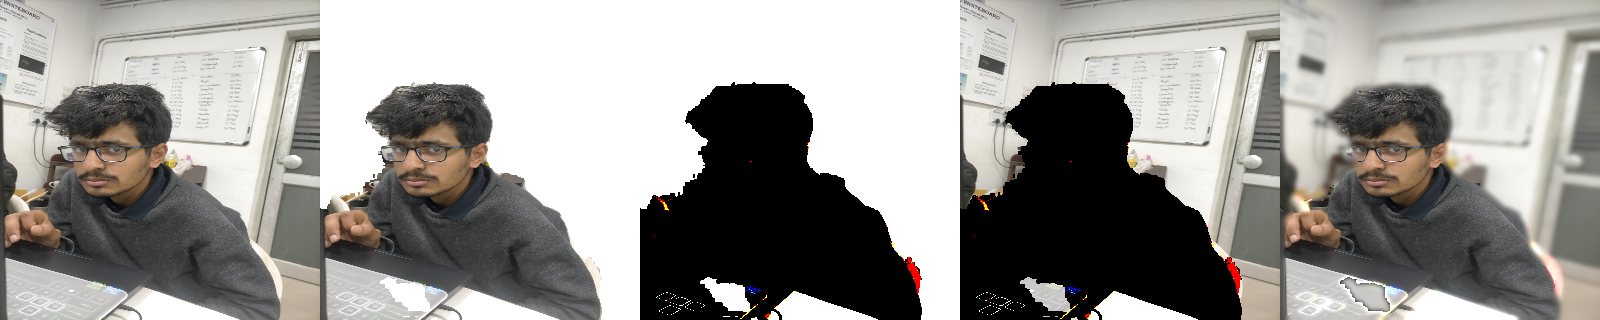

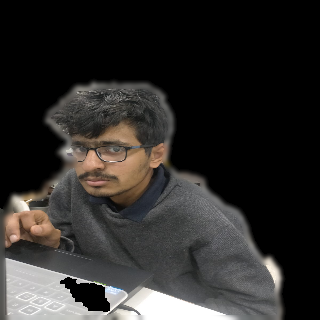

In [242]:
import cv2
import mediapipe as mp
import numpy as np
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from google.colab.patches import cv2_imshow


segmentor = SelfiSegmentation()


img_o = cv2.imread('mahaveer.jpg')
img1=cv2.imread('ocean.jpg')
img1=cv2.resize(img1,(320,320))
img=cv2.resize(img_o,(320,320))
Gaussian=cv2.GaussianBlur(img,(13,13),0)

# Perform background removal
imgout = segmentor.removeBG(img, (255, 255, 255), cutThreshold=0.1)
imgout2 = segmentor.removeBG(img, (0, 0, 0), cutThreshold=0.1)
# lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# lower_bound = np.array([0, 128, 0], dtype=np.uint8)
# upper_bound = np.array([220, 220, 200], dtype=np.uint8)
# mask = cv2.inRange(lab_img, lower_bound, upper_bound)

# Creating the mask for bitwise operation
mask = np.zeros_like(img)
mask_inv=cv2.bitwise_not(mask)
masked_background = cv2.bitwise_and(Gaussian, mask)


gray_img = cv2.cvtColor(imgout, cv2.COLOR_BGR2GRAY)
# blurred_mask = cv2.GaussianBlur(mask, (3, 3), 0)
# blur_edge = cv2.Canny(blurred_mask, 20, 200)
inv_imageout=cv2.bitwise_not(imgout)


ret1, thresh1 = cv2.threshold(inv_imageout, 10, 255, cv2.THRESH_BINARY_INV)
img_binary=cv2.bitwise_and(img,thresh1)
gaussian_blur=cv2.GaussianBlur(img_binary,(13,13),0)

# ret2, thresh2 = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1, 1), np.uint8)
eroded_edges = cv2.erode(imgout2, kernel)
edges = cv2.Canny(imgout2, 10, 200)
eroded_edges =cv2.GaussianBlur(eroded_edges,(13,13),0)

#blurring the edges
blurred_img = cv2.GaussianBlur(imgout2, (13, 13), 0)

gray = cv2.cvtColor(imgout2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgout2.shape, np.uint8)
cv2.drawContours(mask, contours, -1, (200, 200, 200), 7)
output = np.where(mask == (200, 200, 200), blurred_img, imgout2)


final_output=cv2.add(gaussian_blur,output)#imgout2
change_background=cv2.add(img1,imgout2)
result = img1.copy()
result[:imgout.shape[0], :imgout.shape[1]] = imgout

cv2_imshow(np.hstack([img,imgout, thresh1,img_binary,final_output]))







cv2_imshow(output)
# cv2_imshow(imgout)
# cv2_imshow(thresh1)
# cv2_imshow(img_binary)
# cv2_imshow(final_output)



MY Code Modification

['img' 'imgout' 'inv_imageout' 'thresh1' 'img_binary' 'final_output']


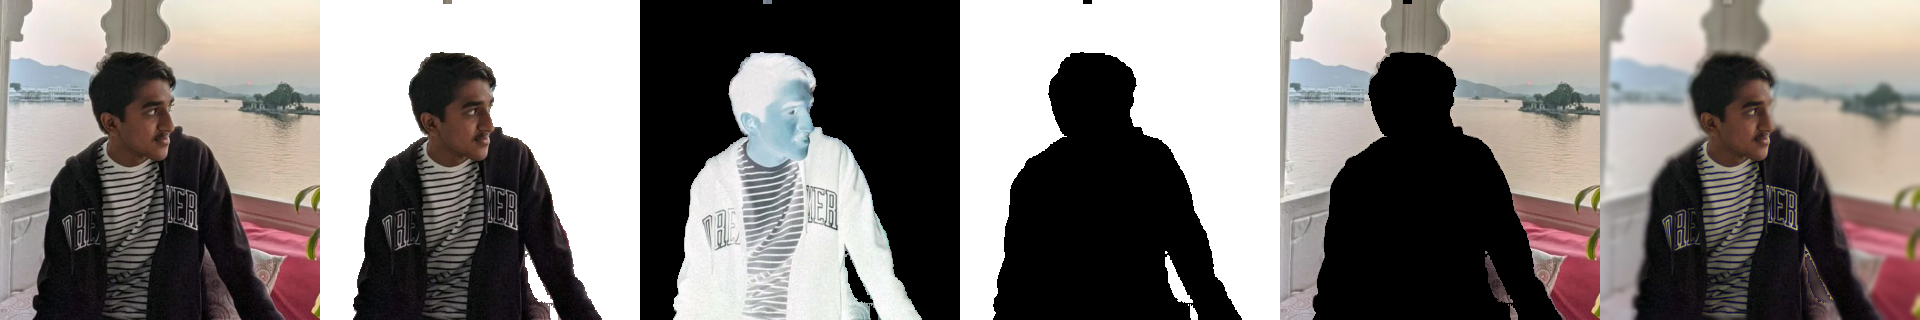

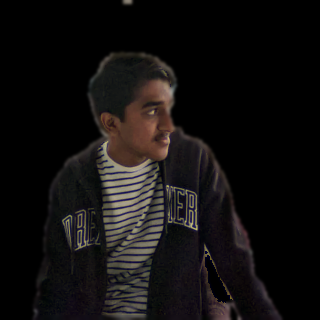

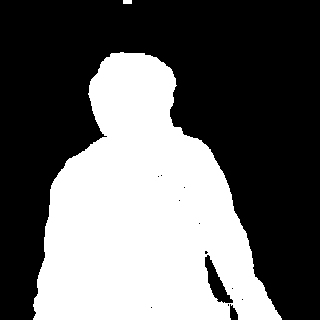

In [275]:
import cv2
import mediapipe as mp
import numpy as np
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from google.colab.patches import cv2_imshow


segmentor = SelfiSegmentation()


img_o = cv2.imread('priyansh.jpg')
img1=cv2.imread('ocean.jpg')
img1=cv2.resize(img1,(320,320))
img=cv2.resize(img_o,(320,320))
Gaussian=cv2.GaussianBlur(img,(23,23),0)

  # Perform background removal
imgout = segmentor.removeBG(img, (255, 255, 255), cutThreshold=0.4)
imgout2 = segmentor.removeBG(img, (0, 0, 0), cutThreshold=0.4)                  #after cutout make its background as black

  # Creating the mask for bitwise operation (black screen for masking and all)
mask = np.zeros_like(img)
mask_inv=cv2.bitwise_not(mask)
masked_background = cv2.bitwise_and(Gaussian, mask)

inv_imageout=cv2.bitwise_not(imgout)                                            #make the negative image of of image cut


ret1, thresh1 = cv2.threshold(inv_imageout, 10, 255, cv2.THRESH_BINARY_INV)
img_binary=cv2.bitwise_and(img,thresh1)
gaussian_blur=cv2.GaussianBlur(img_binary,(13,13),0)

#try by eroding the edges
  # ret2, thresh2 = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY_INV)
  # kernel = np.ones((1, 1), np.uint8)
  # eroded_edges = cv2.erode(imgout2, kernel)
  # edges = cv2.Canny(imgout2, 10, 200)
  # eroded_edges =cv2.GaussianBlur(eroded_edges,(13,13),0)

#blurring the edges
blurred_img = cv2.GaussianBlur(imgout2, (7, 7), 0)
gray = cv2.cvtColor(imgout2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgout2.shape, np.uint8)
cv2.drawContours(mask, contours, -1, (0, 255, 255), 7)
output = np.where(mask == (0, 255, 255), blurred_img, imgout2)


final_output=cv2.add(gaussian_blur,output)                                      #imgout2 is replace with
#try to changing the background
  # change_background=cv2.add(img1,imgout2)
  # result = img1.copy()
  # result[:imgout.shape[0], :imgout.shape[1]] = imgout
print(np.hstack(["img","imgout","inv_imageout", "thresh1","img_binary","final_output"]))
cv2_imshow(np.hstack([img,imgout,inv_imageout, thresh1,img_binary,final_output]))







cv2_imshow(output)
cv2_imshow(thresh)
# cv2_imshow(thresh1)
# cv2_imshow(img_binary)
# cv2_imshow(final_output)



# modifiction


In [200]:
import cv2
import mediapipe as mp
import numpy as np
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from google.colab.patches import cv2_imshow



In [201]:

segmentor = SelfiSegmentation()


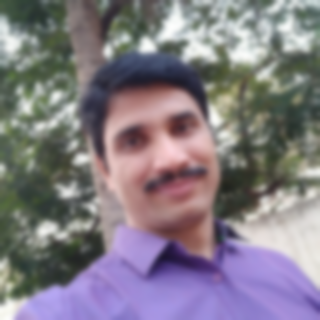

In [219]:

img_o = cv2.imread('image1.jpg')
img1=cv2.imread('ocean.jpg')
img1=cv2.resize(img1,(320,320))
img=cv2.resize(img_o,(320,320))
Gaussian=cv2.GaussianBlur(img,(15,15),0)

cv2_imshow(Gaussian)

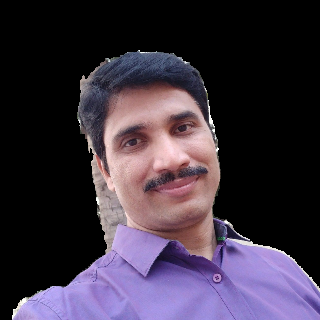

In [220]:

# Perform background removal
imgout = segmentor.removeBG(img, (255, 255, 255), cutThreshold=0.1)
imgout2 = segmentor.removeBG(img, (0, 0, 0), cutThreshold=0.1)
# lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# lower_bound = np.array([0, 128, 0], dtype=np.uint8)
# upper_bound = np.array([220, 220, 200], dtype=np.uint8)
# mask = cv2.inRange(lab_img, lower_bound, upper_bound)
cv2_imshow(imgout2)

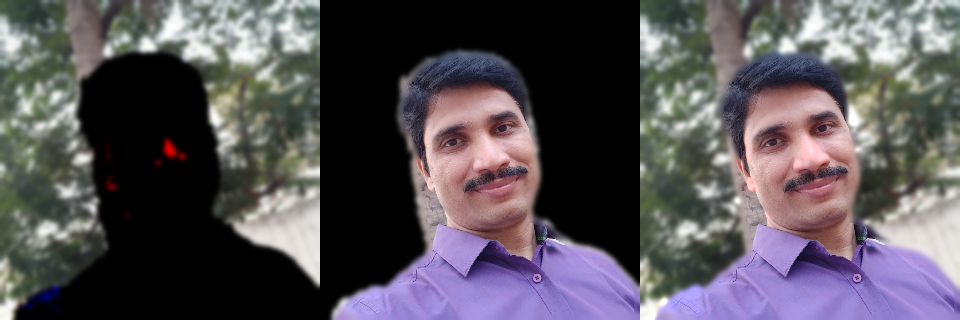

In [221]:
#blurring the edges
#blurred_img = cv2.GaussianBlur(imgout2, (13, 13), 0)

gray = cv2.cvtColor(imgout2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgout2.shape, np.uint8)
cv2.drawContours(mask, contours, -1, (200, 200, 200), 9)
blurred_img = cv2.GaussianBlur(imgout2, (13, 13), 0)
output = np.where(mask == (200, 200, 200), blurred_img, imgout2)


inv_imageout=cv2.bitwise_not(imgout)

ret1, thresh1 = cv2.threshold(inv_imageout, 10, 255, cv2.THRESH_BINARY_INV)
img_binary1=cv2.bitwise_and(img,thresh1)
Gaussian1=cv2.GaussianBlur(img_binary1,(13,13),0)

img_w = cv2.add(Gaussian1, output)

#img_binary = cv2.bitwise_and(output,Gaussian1)

'''final_output=cv2.add(gaussian_blur,output)#imgout2
change_background=cv2.add(img1,imgout)
result = img1.copy()
result[:imgout.shape[0], :imgout.shape[1]] = imgout'''

cv2_imshow(np.hstack([Gaussian1, output, img_w]))


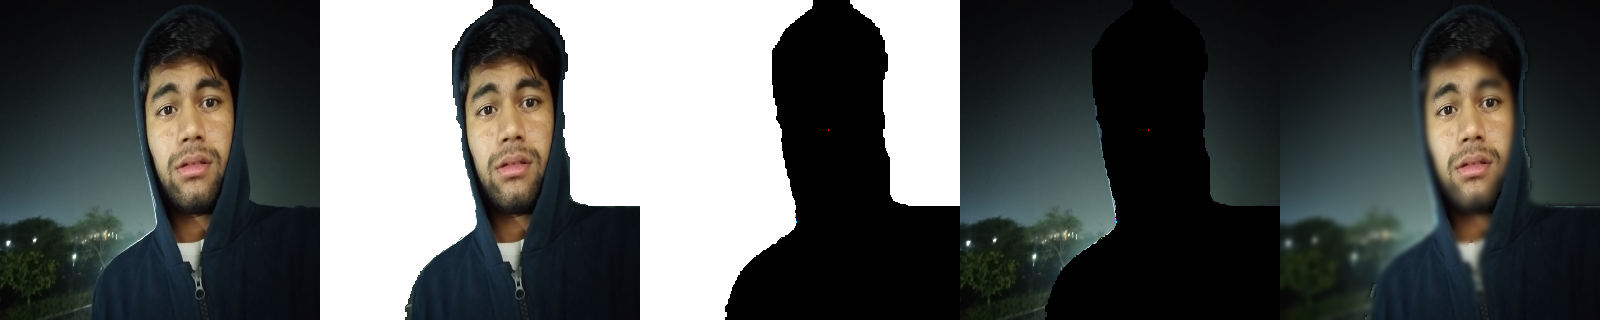

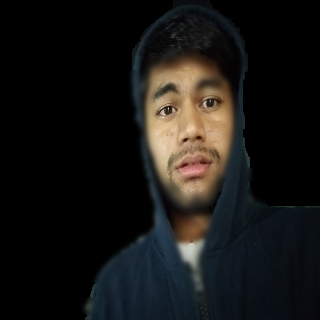

In [149]:



# Creating the mask for bitwise operation
mask = np.zeros_like(img)
mask_inv=cv2.bitwise_not(mask)
masked_background = cv2.bitwise_and(Gaussian, mask)


gray_img = cv2.cvtColor(imgout, cv2.COLOR_BGR2GRAY)
# blurred_mask = cv2.GaussianBlur(mask, (3, 3), 0)
# blur_edge = cv2.Canny(blurred_mask, 20, 200)
inv_imageout=cv2.bitwise_not(imgout)


ret1, thresh1 = cv2.threshold(inv_imageout, 10, 255, cv2.THRESH_BINARY_INV)
img_binary=cv2.bitwise_and(img,thresh1)
gaussian_blur=cv2.GaussianBlur(img_binary,(13,13),0)

# ret2, thresh2 = cv2.threshold(blurred_mask, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((1, 1), np.uint8)
eroded_edges = cv2.erode(imgout2, kernel)
edges = cv2.Canny(imgout2, 10, 200)
eroded_edges =cv2.GaussianBlur(eroded_edges,(13,13),0)

#blurring the edges
blurred_img = cv2.GaussianBlur(imgout2, (13, 13), 0)

gray = cv2.cvtColor(imgout2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgout2.shape, np.uint8)
cv2.drawContours(mask, contours, -1, (200, 200, 200), 13)
output = np.where(mask == (200, 200, 200), blurred_img, imgout2)


final_output=cv2.add(gaussian_blur,output)#imgout2
change_background=cv2.add(img1,imgout2)
result = img1.copy()
result[:imgout.shape[0], :imgout.shape[1]] = imgout

cv2_imshow(np.hstack([img,imgout, thresh1,img_binary,final_output]))







cv2_imshow(output)
# cv2_imshow(imgout)
# cv2_imshow(thresh1)
# cv2_imshow(img_binary)
# cv2_imshow(final_output)

